# Unit 1: Train your first Deep Reinforcement Learning Agent 🤖
![Cover](https://github.com/huggingface/deep-rl-class/blob/main/unit1/assets/img/thumbnail.png?raw=true)

In this notebook, you'll train your **first Deep Reinforcement Learning agent** a Lunar Lander agent that will learn to **land correctly on the Moon 🌕**. Using [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) a Deep Reinforcement Learning library, share them with the community, and experiment with different configurations

⬇️ Here is an example of what **you will achieve in just a couple of minutes.** ⬇️




In [ ]:
%%html
<video controls autoplay><source src="https://huggingface.co/ThomasSimonini/ppo-LunarLander-v2/resolve/main/replay.mp4" type="video/mp4"></video>

### The environment 🎮
- [LunarLander-v2](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)

### The library used 📚
- [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/)

We're constantly trying to improve our tutorials, so **if you find some issues in this notebook**, please [open an issue on the Github Repo](https://github.com/huggingface/deep-rl-class/issues).

## Objectives of this notebook 🏆
At the end of the notebook, you will:
- Be able to use **Gym**, the environment library.
- Be able to use **Stable-Baselines3**, the deep reinforcement learning library.
- Be able to **push your trained agent to the Hub** with a nice video replay and an evaluation score 🔥.




## This notebook is from Deep Reinforcement Learning Course
<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/deep-rl-course-illustration.jpg" alt="Deep RL Course illustration"/>

In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, CleanRL and Sample Factory 2.0.
- 🤖 Train **agents in unique environments** 

And more check 📚 the syllabus 👉 https://simoninithomas.github.io/deep-rl-course

Don’t forget to **<a href="http://eepurl.com/ic5ZUD">sign up to the course</a>** (we are collecting your email to be able to **send you the links when each Unit is published and give you information about the challenges and updates).**


The best way to keep in touch and ask questions is to join our discord server to exchange with the community and with us 👉🏻 https://discord.gg/ydHrjt3WP5

## Prerequisites 🏗️
Before diving into the notebook, you need to:

🔲 📝 **[Read Unit 0](https://huggingface.co/deep-rl-course/unit0/introduction)** that gives you all the **information about the course and help you to onboard** 🤗

🔲 📚 **Develop an understanding of the foundations of Reinforcement learning** (MC, TD, Rewards hypothesis...) by [reading Unit 1](https://huggingface.co/deep-rl-course/unit1/introduction).

## A small recap of what is Deep Reinforcement Learning 📚
<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

Let's do a small recap on what we learned in the first Unit:
- Reinforcement Learning is a **computational approach to learning from action**. We build an agent that learns from the environment by **interacting with it through trial and error** and receiving rewards (negative or positive) as feedback.

- The goal of any RL agent is to **maximize its expected cumulative reward** (also called expected return) because RL is based on the _reward hypothesis_, which is that all goals can be described as the maximization of the expected cumulative reward.

- The RL process is a **loop that outputs a sequence of state, action, reward, and next state**.

- To calculate the expected cumulative reward (expected return), **we discount the rewards**: the rewards that come sooner (at the beginning of the game) are more probable to happen since they are more predictable than the long-term future reward.

- To solve an RL problem, you want to **find an optimal policy**; the policy is the "brain" of your AI that will tell us what action to take given a state. The optimal one is the one that gives you the actions that max the expected return.


There are **two** ways to find your optimal policy:
- By **training your policy directly**: policy-based methods.
- By **training a value function** that tells us the expected return the agent will get at each state and use this function to define our policy: value-based methods.

- Finally, we spoke about Deep RL because **we introduce deep neural networks to estimate the action to take (policy-based) or to estimate the value of a state (value-based) hence the name "deep."**

# Let's train our first Deep Reinforcement Learning agent and upload it to the Hub 🚀


## Get a certificate
To validate this hands-on for the [certification process](https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process), you need to push your trained model to the Hub and **get a result of >= 200**.

To find your result, go to the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) and find your model, **the result = mean_reward - std of reward**

For more information about the certification process, check this section 👉 https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process

## Set the GPU 💪
- To **accelerate the agent's training, we'll use a GPU**. To do that, go to `Runtime > Change Runtime type`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step1.jpg" alt="GPU Step 1">

- `Hardware Accelerator > GPU`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step2.jpg" alt="GPU Step 2">

## Install dependencies and create a virtual screen 🔽
The first step is to install the dependencies, we’ll install multiple ones.

- `gym[box2D]`: Contains the LunarLander-v2 environment 🌛 (we use `gym==0.21`)
- `stable-baselines3[extra]`: The deep reinforcement learning library.
- `huggingface_sb3`: Additional code for Stable-baselines3 to load and upload models from the Hugging Face 🤗 Hub.

To make things easier, we created a script to install all these dependencies.

In [ ]:
!apt install swig cmake

TODO CHANGE LINK OF THE REQUIREMENTS

In [ ]:
!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit1/requirements-unit1.txt

During the notebook, we'll need to generate a replay video. To do so, with colab, **we need to have a virtual screen to be able to render the environment** (and thus record the frames). 

Hence the following cell will install virtual screen libraries and create and run a virtual screen 🖥

In [ ]:
!sudo apt-get update
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

To make sure the new installed libraries are used, **sometimes it's required to restart the notebook runtime**. The next cell will force the **runtime to crash, so you'll need to connect again and run the code starting from here**. Thanks for this trick, **we will be able to run our virtual screen.**

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Import the packages 📦

One additional library we import is huggingface_hub **to be able to upload and download trained models from the hub**.


The Hugging Face Hub 🤗 works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations and other features that will allow you to easily collaborate with others.

You can see here all the Deep reinforcement Learning models available 👉 https://huggingface.co/models?pipeline_tag=reinforcement-learning&sort=downloads



In [ ]:
import gym

from huggingface_sb3 import load_from_hub, package_to_hub, push_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env

## Understand what is Gym and how it works 🤖

🏋 The library containing our environment is called Gym.
**You'll use Gym a lot in Deep Reinforcement Learning.**

The Gym library provides two things:
- An interface that allows you to **create RL environments**.
- A **collection of environments** (gym-control, atari, box2D...).

Let's look at an example, but first let's remember what's the RL Loop.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

At each step:
- Our Agent receives **state S0** from the **Environment** — we receive the first frame of our game (Environment).
- Based on that **state S0,** the Agent takes **action A0** — our Agent will move to the right.
- Environment to a **new** **state S1** — new frame.
- The environment gives some **reward R1** to the Agent — we’re not dead *(Positive Reward +1)*.


With Gym:

1️⃣ We create our environment using `gym.make()`

2️⃣ We reset the environment to its initial state with `observation = env.reset()`

At each step:

3️⃣ Get an action using our model (in our example we take a random action)

4️⃣ Using `env.step(action)`, we perform this action in the environment and get
- `observation`: The new state (st+1)
- `reward`: The reward we get after executing the action
- `done`: Indicates if the episode terminated
- `info`: A dictionary that provides additional information (depends on the environment).

If the episode is done:
- We reset the environment to its initial state with `observation = env.reset()`

**Let's look at an example!** Make sure to read the code


In [ ]:
import gym

# First, we create our environment called LunarLander-v2
env = gym.make("LunarLander-v2")

# Then we reset this environment
observation = env.reset()

for _ in range(20):
  # Take a random action
  action = env.action_space.sample()
  print("Action taken:", action)

  # Do this action in the environment and get
  # next_state, reward, done and info
  observation, reward, done, info = env.step(action)
  
  # If the game is done (in our case we land, crashed or timeout)
  if done:
      # Reset the environment
      print("Environment is reset")
      observation = env.reset()

## Create the LunarLander environment 🌛 and understand how it works
### [The environment 🎮](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)
In this first tutorial, we’re going to train our agent, a [Lunar Lander](https://www.gymlibrary.dev/environments/box2d/lunar_lander/), **to land correctly on the moon**. To do that, the agent needs to learn **to adapt its speed and position(horizontal, vertical, and angular) to land correctly.**


---


💡 A good habit when you start to use an environment is to check its documentation 

👉 https://www.gymlibrary.dev/environments/box2d/lunar_lander/

---


Let's see what the Environment looks like:


In [ ]:
# We create our environment with gym.make("<name_of_the_environment>")
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

We see with `Observation Space Shape (8,)` that the observation is a vector of size 8, where each value contains different information about the lander:
- Horizontal pad coordinate (x)
- Vertical pad coordinate (y)
- Horizontal speed (x)
- Vertical speed (y)
- Angle
- Angular speed
- If the left leg has contact point touched the land
- If the right leg has contact point touched the land


In [ ]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action

The action space (the set of possible actions the agent can take) is discrete with 4 actions available 🎮: 

- Do nothing,
- Fire left orientation engine,
- Fire the main engine,
- Fire right orientation engine.

Reward function (the function that will gives a reward at each timestep) 💰:

- Moving from the top of the screen to the landing pad and zero speed is about 100~140 points.
- Firing main engine is -0.3 each frame
- Each leg ground contact is +10 points
- Episode finishes if the lander crashes (additional - 100 points) or come to rest (+100 points)

#### Vectorized Environment
- We create a vectorized environment (method for stacking multiple independent environments into a single environment) of 16 environments, this way, **we'll have more diverse experiences during the training.**

In [ ]:
# Create the environment
env = make_vec_env('LunarLander-v2', n_envs=16)

## Create the Model 🤖
- Now that we studied our environment and we understood the problem: **being able to land correctly the Lunar Lander to the Landing Pad by controlling left, right and main orientation engine**. Let's build the algorithm we're going to use to solve this Problem 🚀.

- To do so, we're going to use our first Deep RL library, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

---

💡 A good habit when using a new library is to dive first on the documentation: https://stable-baselines3.readthedocs.io/en/master/ and then try some tutorials.

----

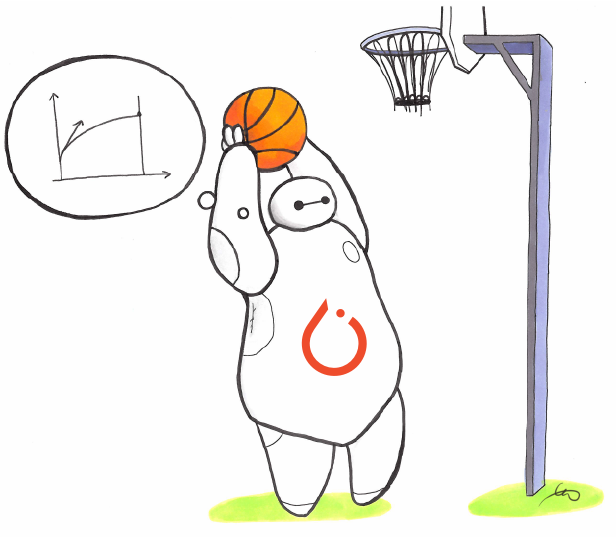

To solve this problem, we're going to use SB3 **PPO**. [PPO (aka Proximal Policy Optimization) is one of the of the SOTA (state of the art) Deep Reinforcement Learning algorithms that you'll study during this course](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D).

PPO is a combination of:
- *Value-based reinforcement learning method*: learning an action-value function that will tell us what's the **most valuable action to take given a state and action**.
- *Policy-based reinforcement learning method*: learning a policy that will **gives us a probability distribution over actions**.


Stable-Baselines3 is easy to set up:

1️⃣ You **create your environment** (in our case it was done above)

2️⃣ You define the **model you want to use and instantiate this model** `model = PPO("MlpPolicy")`

3️⃣ You **train the agent** with `model.learn` and define the number of training timesteps

```
# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
```



In [ ]:
# TODO: Define a PPO MlpPolicy architecture
# We use MultiLayerPerceptron (MLPPolicy) because the input is a vector,
# if we had frames as input we would use CnnPolicy
model = 

#### Solution

In [ ]:
# SOLUTION
# We added some parameters to accelerate the training
model = PPO(
    policy = 'MlpPolicy',
    env = env,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

## Train the PPO agent 🏃
- Let's train our agent for 1,000,000 timesteps, don't forget to use GPU on Colab. It will take approximately ~20min, but you can use less timesteps if you just want to try it out.
- During the training, take a ☕ break you deserved it 🤗

In [ ]:
# TODO: Train it for 1,000,000 timesteps

# TODO: Specify file name for model and save the model to file
model_name = ""


#### Solution

In [ ]:
# SOLUTION
# Train it for 1,000,000 timesteps
model.learn(total_timesteps=1000000)
# Save the model
model_name = "ppo-LunarLander-v2"
model.save(model_name)

## Evaluate the agent 📈
- Now that our Lunar Lander agent is trained 🚀, we need to **check its performance**.
- Stable-Baselines3 provides a method to do that: `evaluate_policy`.
- To fill that part you need to [check the documentation](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html#basic-usage-training-saving-loading)
- In the next step,  we'll see **how to automatically evaluate and share your agent to compete in a leaderboard, but for now let's do it ourselves**


💡 When you evaluate your agent, you should not use your training environment but create an evaluation environment.

In [ ]:
# TODO: Evaluate the agent
# Create a new environment for evaluation
eval_env =

# Evaluate the model with 10 evaluation episodes and deterministic=True
mean_reward, std_reward = 

# Print the results



#### Solution

In [ ]:
#@title
eval_env = gym.make("LunarLander-v2")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

- In my case, I got a mean reward is `200.20 +/- 20.80` after training for 1 million steps, which means that our lunar lander agent is ready to land on the moon 🌛🥳.

## Publish our trained model on the Hub 🔥
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.

📚 The libraries documentation 👉 https://github.com/huggingface/huggingface_sb3/tree/main#hugging-face--x-stable-baselines3-v20

Here's an example of a Model Card (with Space Invaders):

By using `package_to_hub` **you evaluate, record a replay, generate a model card of your agent and push it to the hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account to HF ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/create-token.jpg" alt="Create HF Token">

- Copy the token 
- Run the cell below and paste the token

In [ ]:
notebook_login()
!git config --global credential.helper store

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥 using `package_to_hub()` function

Let's fill the `package_to_hub` function:
- `model`: our trained model.
- `model_name`: the name of the trained model that we defined in `model_save`
- `model_architecture`: the model architecture we used: in our case PPO
- `env_id`: the name of the environment, in our case `LunarLander-v2`
- `eval_env`: the evaluation environment defined in eval_env
- `repo_id`: the name of the Hugging Face Hub Repository that will be created/updated `(repo_id = {username}/{repo_name})`

💡 **A good name is {username}/{model_architecture}-{env_id}**

- `commit_message`: message of the commit

In [ ]:
import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

## TODO: Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
repo_id = 

# TODO: Define the name of the environment
env_id = 

# Create the evaluation env
eval_env = DummyVecEnv([lambda: gym.make(env_id)])


# TODO: Define the model architecture we used
model_architecture = ""

## TODO: Define the commit message
commit_message = ""

# method save, evaluate, generate a model card and record a replay video of your agent before pushing the repo to the hub
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model 
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)

# Note: if after running the package_to_hub function and it gives an issue of rebasing, please run the following code
# cd <path_to_repo> && git add . && git commit -m "Add message" && git pull 
# And don't forget to do a "git push" at the end to push the change to the hub.

#### Solution


In [ ]:
import gym

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

# PLACE the variables you've just defined two cells above
# Define the name of the environment
env_id = "LunarLander-v2"

# TODO: Define the model architecture we used
model_architecture = "PPO"

## Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
## CHANGE WITH YOUR REPO ID
repo_id = "ThomasSimonini/ppo-LunarLander-v2" # Change with your repo id, you can't push with mine 😄

## Define the commit message
commit_message = "Upload PPO LunarLander-v2 trained agent"

# Create the evaluation env
eval_env = DummyVecEnv([lambda: gym.make(env_id)])

# PLACE the package_to_hub function you've just filled here
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model 
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)


Congrats 🥳 you've just trained and uploaded your first Deep Reinforcement Learning agent. The script above should have displayed a link to a model repository such as https://huggingface.co/osanseviero/test_sb3. When you go to this link, you can:
* see a video preview of your agent at the right. 
* click "Files and versions" to see all the files in the repository.
* click "Use in stable-baselines3" to get a code snippet that shows how to load the model.
* a model card (`README.md` file) which gives a description of the model

Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

Compare the results of your LunarLander-v2 with your classmates using the leaderboard 🏆 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard

## Load a saved LunarLander model from the Hub 🤗
Thanks to [ironbar](https://github.com/ironbar) for the contribution.

Loading a saved model from the Hub is really easy. 

You go https://huggingface.co/models?library=stable-baselines3 to see the list of all the Stable-baselines3 saved models.
1. You select one and copy its repo_id

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/copy-id.png" alt="Copy-id"/>

2. Then we just need to use load_from_hub with:
- The repo_id
- The filename: the saved model inside the repo and its extension (*.zip)

In [ ]:
from huggingface_sb3 import load_from_hub
repo_id = "Classroom-workshop/assignment2-omar" # The repo_id
filename = "ppo-LunarLander-v2.zip" # The model filename.zip

# When the model was trained on Python 3.8 the pickle protocol is 5
# But Python 3.6, 3.7 use protocol 4
# In order to get compatibility we need to:
# 1. Install pickle5 (we done it at the beginning of the colab)
# 2. Create a custom empty object we pass as parameter to PPO.load()
custom_objects = {
            "learning_rate": 0.0,
            "lr_schedule": lambda _: 0.0,
            "clip_range": lambda _: 0.0,
}

checkpoint = load_from_hub(repo_id, filename)
model = PPO.load(checkpoint, custom_objects=custom_objects, print_system_info=True)

Let's evaluate this agent:

In [ ]:
#@title
eval_env = gym.make("LunarLander-v2")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

## Some additional challenges 🏆
The best way to learn **is to try things by your own**! As you saw, the current agent is not doing great. As a first suggestion, you can train for more steps. With 1,000,000 steps, we saw some great results! 

In the [Leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here are some ideas to achieve so:
* Train more steps
* Try different hyperparameters of `PPO`. You can see them at https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters. 
* Check the [Stable-Baselines3 documentation](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) and try another models such as DQN.
* **Push your new trained model** on the Hub 🔥

**Compare the results of your LunarLander-v2 with your classmates** using the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) 🏆

Is moon landing too boring to you? Try to **change the environment**, why not using MountainCar-v0, CartPole-v1 or CarRacing-v0? Check how they works [using the gym documentation](https://www.gymlibrary.dev/) and have fun 🎉.

________________________________________________________________________
Congrats on finishing this chapter! That was the biggest one, **and there was a lot of information.**

If you’re still feel confused with all these elements...it's totally normal! **This was the same for me and for all people who studied RL.**

Take time to really **grasp the material before continuing and try the additional challenges**. It’s important to master these elements and having a solid foundations.

Naturally, during the course, we’re going to use and deeper explain again these terms but **it’s better to have a good understanding of them now before diving into the next chapters.**


Next time, in the bonus unit 1, you'll train Huggy the Dog to fetch the stick.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/huggy.jpg" alt="Huggy"/>

## Keep learning, stay awesome 🤗